In [2]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import respy as rp
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Robinson Crusoe economy

In [3]:
params_base, options_base, df = rp.get_example_model("robinson", with_data=True)

Let's look at the parameterization of the model and the specified options.

In [4]:
print(" Parametrization")
print(params_base)
print("\n Options")
options_base

 Parametrization
                                     value
category       name                       
delta          delta                 0.950
wage_fishing   exp_fishing           0.070
nonpec_fishing constant             -0.100
nonpec_hammock constant              1.046
shocks_sdcorr  sd_fishing            0.010
               sd_hammock            0.010
               corr_hammock_fishing  0.000

 Options


{'estimation_draws': 100,
 'estimation_seed': 100,
 'estimation_tau': 0.001,
 'interpolation_points': -1,
 'n_periods': 5,
 'simulation_agents': 1000,
 'simulation_seed': 132,
 'solution_draws': 100,
 'solution_seed': 456,
 'covariates': {'constant': '1'}}

We can study the resulting choice patterns.

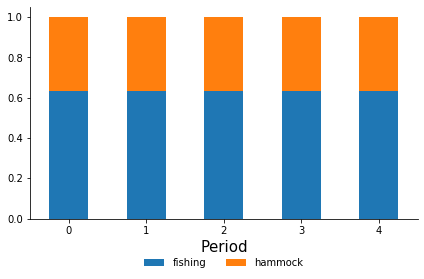

In [5]:
fig, ax = plt.subplots()

df.groupby("Period").Choice.value_counts(normalize=True).unstack().plot.bar(
    stacked=True, ax=ax
)


plt.xticks(rotation="horizontal")

plt.legend(loc="lower center", bbox_to_anchor=(0.5,-0.275), ncol=2)

plt.show()
plt.close()
